In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.listdir()

['skin-disease-dataset',
 'Skin Disease Classification.ipynb',
 '.ipynb_checkpoints']

In [3]:
dataset_url='/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/train_set'

In [4]:
os.listdir(dataset_url)

['.DS_Store',
 'FU-athlete-foot',
 'VI-chickenpox',
 'VI-shingles',
 'FU-nail-fungus',
 'BA-impetigo',
 'PA-cutaneous-larva-migrans',
 'FU-ringworm',
 'normal',
 'BA- cellulitis']

In [5]:
dataset_url

'/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/train_set'

In [6]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/train_set')

In [7]:
cellulitis=list(data_dir.glob('BA- cellulitis/*'))
len(cellulitis)

136

In [8]:
FU_athlete_foot=list(data_dir.glob('FU-athlete-foot/*'))
len(FU_athlete_foot)

124

In [9]:
VI_chickenpoxt=list(data_dir.glob('VI-chickenpox/*'))
len(VI_chickenpoxt)

136

In [10]:
VI_shingles=list(data_dir.glob('VI-shingles/*'))
len(VI_shingles)

130

In [11]:
FU_nail_fungus=list(data_dir.glob('FU-nail-fungus/*'))
len(FU_nail_fungus)

129

In [12]:
BA_impetigo=list(data_dir.glob('BA-impetigo/*'))
len(BA_impetigo)

80

In [13]:
FU_ringworm=list(data_dir.glob('FU-ringworm/*'))
len(FU_ringworm)

90

In [14]:
normal=list(data_dir.glob('normal/*'))
len(normal)

203

In [15]:
PA_cutaneous_larva_migrans=list(data_dir.glob('PA-cutaneous-larva-migrans/*'))
len(PA_cutaneous_larva_migrans)

100

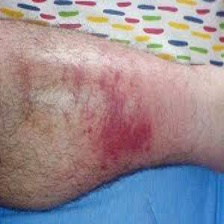

In [16]:
PIL.Image.open(str(cellulitis[0]))

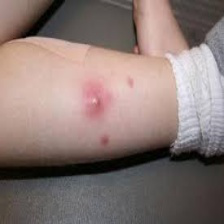

In [17]:
PIL.Image.open(str(cellulitis[16]))

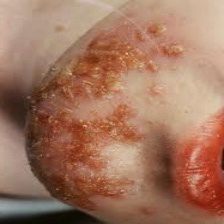

In [18]:
PIL.Image.open(str(BA_impetigo[16]))

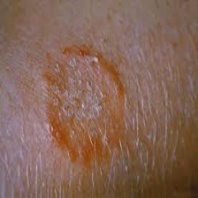

In [19]:
PIL.Image.open(str(FU_ringworm[4]))

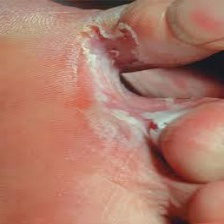

In [20]:
PIL.Image.open(str(FU_athlete_foot[16]))

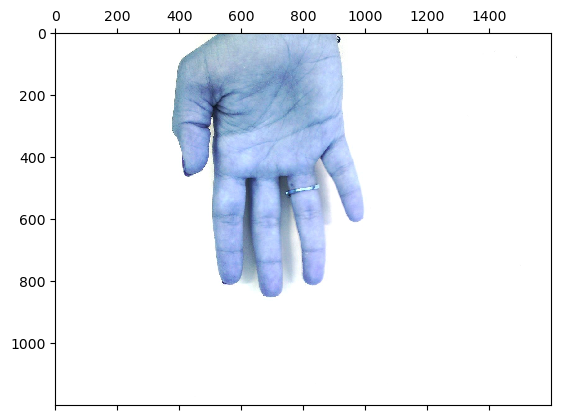

In [21]:
# PIL.Image.open(str(normal[16].resize((200,200))))
image=cv2.imread(str(normal[16]))
image=cv2.resize(image,(1600, 1200))

# # image = PIL.Image.open(str(normal[16])) 
# small_image =  
plt.matshow(image)


In [22]:
image.shape

(1200, 1600, 3)

In [23]:
cv2.imread(str( cellulitis[0])).shape[2]

3

In [24]:
disease_images_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
    'normal':list(data_dir.glob('normal/*')),   
}

In [25]:
disease_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
    'normal':8,
}

In [26]:
x_train = []
y_train = []

for image_name, image_paths in disease_images_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_train.append(image_resize)
        y_train.append(disease_label_dic[image_name])

In [27]:
x_train[0].shape

(224, 224, 3)

In [28]:
len(disease_images_dic['normal']),len(disease_images_dic['shingles'])

(203, 130)

In [29]:
len(x_train)

1126

In [30]:
len(y_train)

1126

In [31]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(1126,)

In [32]:
dataset_url='/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset'

In [33]:
import pathlib
data_dir=pathlib.Path(dataset_url)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset')

In [34]:
disease_images_dic={
    'cellulitis':list(data_dir.glob('test_set/BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('test_set/BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('test_set/FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('test_set/FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('test_set/FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('test_set/PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('test_set/VI-chickenpox/*')),
    'shingles':list(data_dir.glob('test_set/VI-shingles/*')),
    'normal':list(data_dir.glob('test_set/normal/*')),   
}
disease_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
    'normal':8,
}

In [35]:
x_test = []
y_test = []

for image_name, image_paths in disease_images_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(224,224))
        x_test.append(image_resize)
        y_test.append(disease_label_dic[image_name])

In [36]:
# x_train=np.array(x_train)
x_test=np.array(x_test)

In [37]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [38]:
x_test.shape

(332, 224, 224, 3)

In [39]:
x_train_scaled[0]

array([[[0.6627451 , 0.67058824, 0.70196078],
        [0.6627451 , 0.65882353, 0.69411765],
        [0.66666667, 0.63921569, 0.66666667],
        ...,
        [0.67843137, 0.67843137, 0.7254902 ],
        [0.61176471, 0.62352941, 0.67843137],
        [0.5372549 , 0.55686275, 0.61568627]],

       [[0.64313725, 0.65490196, 0.6745098 ],
        [0.65098039, 0.65098039, 0.6745098 ],
        [0.67058824, 0.64313725, 0.67058824],
        ...,
        [0.65490196, 0.6627451 , 0.70196078],
        [0.59215686, 0.61568627, 0.66666667],
        [0.52156863, 0.55294118, 0.60392157]],

       [[0.63137255, 0.64313725, 0.65882353],
        [0.65882353, 0.66666667, 0.67058824],
        [0.69411765, 0.68235294, 0.69019608],
        ...,
        [0.63529412, 0.65490196, 0.69019608],
        [0.59215686, 0.62745098, 0.66666667],
        [0.5372549 , 0.57647059, 0.61568627]],

       ...,

       [[0.64313725, 0.36470588, 0.09803922],
        [0.67843137, 0.40784314, 0.1372549 ],
        [0.6745098 , 0

## Using ANN

In [40]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(1126,)

In [41]:
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(224,224,3)),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(9,activation='sigmoid')
    ]
)

In [42]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 7s 192ms/step - loss: 65.0885 - accuracy: 0.1980
Epoch 2/10
36/36 [==============================] - 7s 192ms/step - loss: 13.3421 - accuracy: 0.2584
Epoch 3/10
36/36 [==============================] - 10s 280ms/step - loss: 8.6960 - accuracy: 0.3126
Epoch 4/10
36/36 [==============================] - 11s 295ms/step - loss: 7.4836 - accuracy: 0.3304
Epoch 5/10
36/36 [==============================] - 12s 334ms/step - loss: 4.9809 - accuracy: 0.3579
Epoch 6/10
36/36 [==============================] - 10s 280ms/step - loss: 6.2673 - accuracy: 0.3437
Epoch 7/10
36/36 [==============================] - 9s 250ms/step - loss: 3.5647 - accuracy: 0.4361
Epoch 8/10
36/36 [==============================] - 13s 372ms/step - loss: 3.4585 - accuracy: 0.4307
Epoch 9/10
36/36 [==============================] - 11s 294ms/step - loss: 5.3671 - accuracy: 0.3792
Epoch 10/10
36/36 [==============================] - 9s 262ms/step - loss: 5.6952 - accuracy

In [46]:
y_test=np.array(y_test)

In [47]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 1s 55ms/step - loss: 2.7387 - accuracy: 0.4729


[2.7387144565582275, 0.47289156913757324]

In [48]:
y_predict=model.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
# y_predict[0]
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 1s 52ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[18,  0,  6,  1,  4,  5,  0,  0,  0],
       [ 4,  3,  3,  0,  9,  0,  0,  0,  0],
       [ 4,  3, 18,  0,  3,  4,  0,  0,  0],
       [ 6,  1, 14,  1,  3,  7,  0,  0,  1],
       [ 2,  1,  0,  0, 17,  3,  0,  0,  0],
       [ 5,  0,  6,  0,  7,  7,  0,  0,  0],
       [ 5,  0, 13,  0,  2, 13,  0,  0,  1],
       [ 3,  0,  8,  1, 20,  1,  0,  0,  0],
       [ 5,  0,  0,  1,  0,  0,  0,  0, 93]], dtype=int32)>

In [49]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.53      0.42        34
           1       0.38      0.16      0.22        19
           2       0.26      0.56      0.36        32
           3       0.25      0.03      0.05        33
           4       0.26      0.74      0.39        23
           5       0.17      0.28      0.22        25
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00        33
           8       0.98      0.94      0.96        99

    accuracy                           0.47       332
   macro avg       0.29      0.36      0.29       332
weighted avg       0.43      0.47      0.42       332



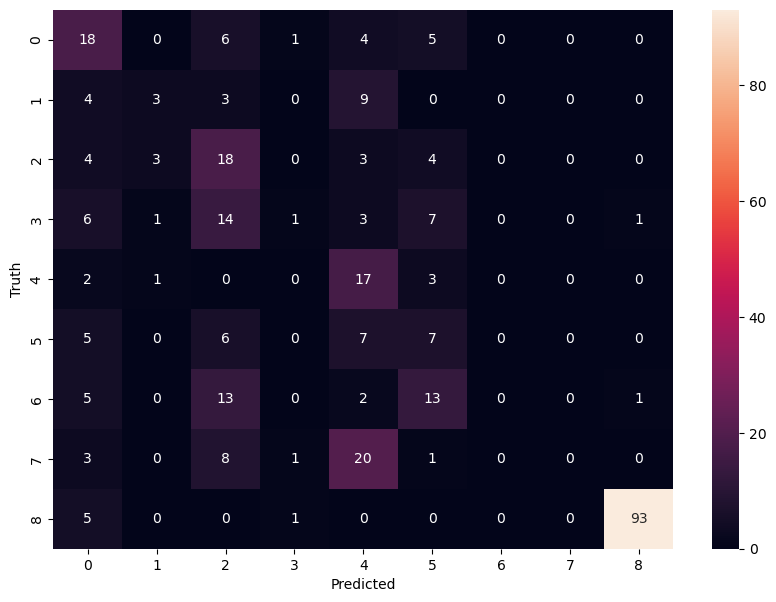

In [50]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [57]:
model.save("/Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/ANN Model")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/ANN Model/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/ANN Model/assets


# CNN

In [52]:
cnn=keras.Sequential(
    [
#         CNN Layer
#         filters here means number of filters
#         kernel_size=(3,3) size of the filter
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
#         In middle no need to specify the input shape
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(9,activation='softmax')
    ]
)
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 33s 912ms/step - loss: 3.6010 - accuracy: 0.2460
Epoch 2/10
36/36 [==============================] - 30s 824ms/step - loss: 1.2892 - accuracy: 0.5613
Epoch 3/10
36/36 [==============================] - 28s 759ms/step - loss: 0.8227 - accuracy: 0.7327
Epoch 4/10
36/36 [==============================] - 43s 1s/step - loss: 0.5008 - accuracy: 0.8419
Epoch 5/10
36/36 [==============================] - 32s 899ms/step - loss: 0.2405 - accuracy: 0.9281
Epoch 6/10
36/36 [==============================] - 27s 741ms/step - loss: 0.1157 - accuracy: 0.9725
Epoch 7/10
36/36 [==============================] - 29s 819ms/step - loss: 0.0711 - accuracy: 0.9858
Epoch 8/10
36/36 [==============================] - 29s 799ms/step - loss: 0.0430 - accuracy: 0.9920
Epoch 9/10
36/36 [==============================] - 31s 861ms/step - loss: 0.0280 - accuracy: 0.9920
Epoch 10/10
36/36 [==============================] - 28s 783ms/step - loss: 0.0115 - accuracy:

In [58]:
cnn.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 3s 265ms/step - loss: 0.7784 - accuracy: 0.8373


[0.7784348726272583, 0.8373494148254395]

In [59]:
y_predict=cnn.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 3s 231ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[24,  3,  0,  1,  0,  5,  0,  1,  0],
       [ 0, 13,  2,  0,  1,  0,  0,  3,  0],
       [ 1,  0, 26,  0,  0,  2,  2,  1,  0],
       [ 5,  0,  1, 21,  0,  2,  0,  3,  1],
       [ 2,  0,  0,  0, 18,  1,  0,  2,  0],
       [ 5,  0,  0,  0,  0, 19,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 33,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  1, 29,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0, 95]], dtype=int32)>

In [60]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        34
           1       0.76      0.68      0.72        19
           2       0.90      0.81      0.85        32
           3       0.78      0.64      0.70        33
           4       0.90      0.78      0.84        23
           5       0.63      0.76      0.69        25
           6       0.92      0.97      0.94        34
           7       0.72      0.88      0.79        33
           8       0.99      0.96      0.97        99

    accuracy                           0.84       332
   macro avg       0.81      0.80      0.80       332
weighted avg       0.84      0.84      0.84       332



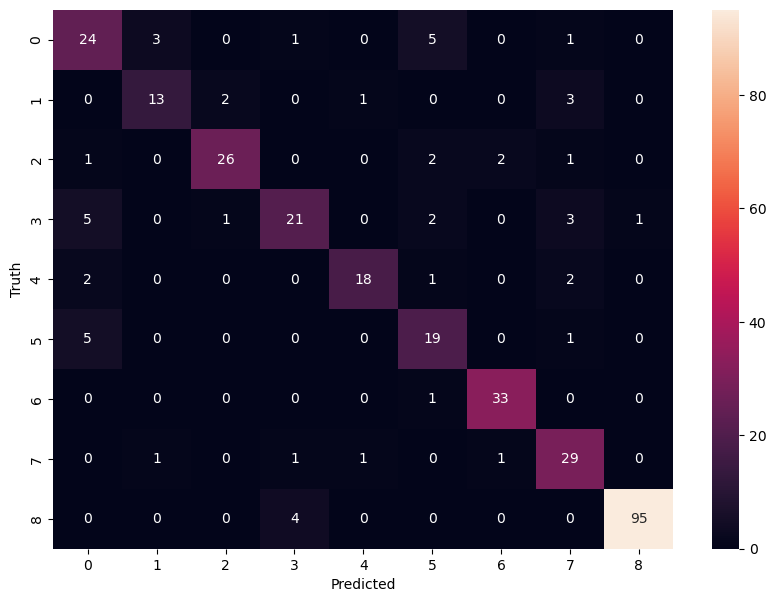

In [61]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [62]:
model.save("/Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/CNN Model")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/CNN Model/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/CNN Model/assets


# Using Data Augmentation + Padding

In [63]:
data_augmentation=keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(224,224,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [64]:
model=keras.Sequential(
    [
        data_augmentation,
        keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'),
        keras.layers.MaxPool2D((2,2)),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(9,activation='softmax'),
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 25s 687ms/step - loss: 1.9238 - accuracy: 0.2593
Epoch 2/10
36/36 [==============================] - 21s 573ms/step - loss: 1.5720 - accuracy: 0.4050
Epoch 3/10
36/36 [==============================] - 20s 547ms/step - loss: 1.4152 - accuracy: 0.4716
Epoch 4/10
36/36 [==============================] - 22s 619ms/step - loss: 1.2645 - accuracy: 0.5444
Epoch 5/10
36/36 [==============================] - 21s 579ms/step - loss: 1.2290 - accuracy: 0.5542
Epoch 6/10
36/36 [==============================] - 31s 848ms/step - loss: 1.0845 - accuracy: 0.6039
Epoch 7/10
36/36 [==============================] - 22s 598ms/step - loss: 1.0439 - accuracy: 0.6385
Epoch 8/10
36/36 [==============================] - 34s 942ms/step - loss: 0.9432 - accuracy: 0.6625
Epoch 9/10
36/36 [==============================] - 27s 739ms/step - loss: 0.8887 - accuracy: 0.6874
Epoch 10/10
36/36 [==============================] - 26s 734ms/step - loss: 0.8366 - accura

In [65]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 3s 241ms/step - loss: 0.8773 - accuracy: 0.7048


[0.8772855997085571, 0.7048192620277405]

In [66]:
y_predict=model.predict(x_test_scaled)
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))

confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

11/11 [==============================] - 2s 193ms/step


<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[22,  0,  2,  1,  0,  6,  2,  1,  0],
       [ 2,  1,  1,  0,  5,  1,  1,  8,  0],
       [ 0,  0, 28,  0,  0,  3,  1,  0,  0],
       [ 1,  0, 13, 14,  0,  2,  2,  0,  1],
       [ 1,  0,  1,  0, 11,  5,  2,  3,  0],
       [ 3,  1,  4,  1,  1, 11,  2,  2,  0],
       [ 2,  0,  0,  0,  0,  4, 27,  1,  0],
       [ 1,  2,  3,  2,  2,  0,  2, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99]], dtype=int32)>

In [67]:
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        34
           1       0.25      0.05      0.09        19
           2       0.54      0.88      0.67        32
           3       0.78      0.42      0.55        33
           4       0.58      0.48      0.52        23
           5       0.34      0.44      0.39        25
           6       0.69      0.79      0.74        34
           7       0.58      0.64      0.61        33
           8       0.99      1.00      0.99        99

    accuracy                           0.70       332
   macro avg       0.60      0.59      0.58       332
weighted avg       0.70      0.70      0.69       332



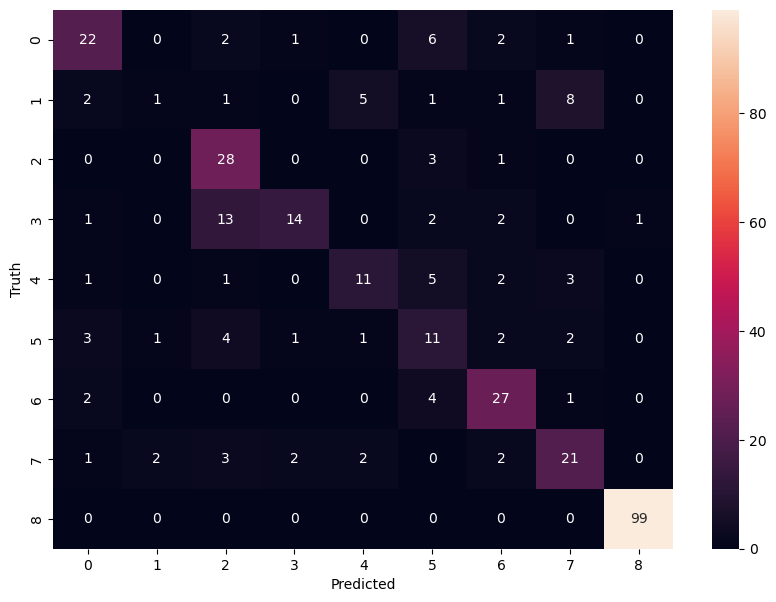

In [68]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [69]:
model.save("/Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/Data Augmented Model")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/Data Augmented Model/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/Data Augmented Model/assets


# Trasfering Learning

In [70]:
import tensorflow_hub as hub

In [71]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224, 224, 3),
                                         trainable=False)  

In [72]:
x_train_scaled.shape

(1126, 224, 224, 3)

In [73]:
# y_train=np.array(y_train)
# y_test=np.array(y_test)

In [74]:
model=keras.Sequential(
    [
        feature_extractor_layer,
        keras.layers.Dense(9,activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
36/36 [==============================] - 16s 394ms/step - loss: 1.1871 - accuracy: 0.6297
Epoch 2/10
36/36 [==============================] - 14s 379ms/step - loss: 0.3809 - accuracy: 0.9023
Epoch 3/10
36/36 [==============================] - 14s 389ms/step - loss: 0.2183 - accuracy: 0.9618
Epoch 4/10
36/36 [==============================] - 13s 361ms/step - loss: 0.1587 - accuracy: 0.9796
Epoch 5/10
36/36 [==============================] - 14s 398ms/step - loss: 0.1186 - accuracy: 0.9822
Epoch 6/10
36/36 [==============================] - 14s 391ms/step - loss: 0.0948 - accuracy: 0.9920
Epoch 7/10
36/36 [==============================] - 17s 476ms/step - loss: 0.0738 - accuracy: 0.9938
Epoch 8/10
36/36 [==============================] - 19s 526ms/step - loss: 0.0612 - accuracy: 0.9982
Epoch 9/10
36/36 [==============================] - 14s 394ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 10/10
36/36 [==============================] - 14s 382ms/step - loss: 0.0417 - accura

In [75]:
y_test=np.array(y_test)

In [76]:
model.evaluate(x_test_scaled,y_test)

11/11 [==============================] - 6s 514ms/step - loss: 0.0817 - accuracy: 0.9819


[0.0816570445895195, 0.9819276928901672]

In [77]:
y_predict=model.predict(x_test_scaled)
# y_predict[0]
y_predicted_labels=[]
for i in y_predict:
    y_predicted_labels.append(np.argmax(i))
    
y_predicted_labels=np.array(y_predicted_labels)

11/11 [==============================] - 5s 388ms/step


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       1.00      1.00      1.00        19
           2       0.97      0.97      0.97        32
           3       0.97      1.00      0.99        33
           4       0.96      0.96      0.96        23
           5       0.96      0.96      0.96        25
           6       1.00      0.97      0.99        34
           7       0.97      0.97      0.97        33
           8       1.00      1.00      1.00        99

    accuracy                           0.98       332
   macro avg       0.98      0.98      0.98       332
weighted avg       0.98      0.98      0.98       332



In [79]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[33,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 24,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 99]], dtype=int32)>

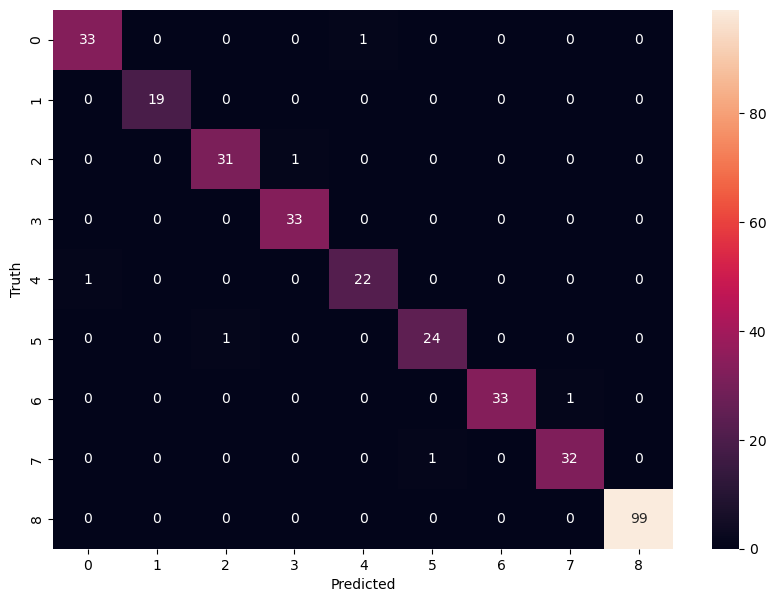

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [81]:
model.save("/Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/transfer_learning_model")

INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/transfer_learning_model/assets


INFO:tensorflow:Assets written to: /Users/nikunjhemani/Desktop/Skin_Disease_Classification/saved_models/transfer_learning_model/assets


In [84]:
path='/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/Testing'

In [85]:
import pathlib
data_dir=pathlib.Path(path)
data_dir

PosixPath('/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/Testing')

In [86]:
testing_image_paths = list(data_dir.glob('*.jpg'))

In [87]:
len(testing_image_paths)

2

In [88]:
str(testing_image_paths[0])

'/Users/nikunjhemani/Desktop/Skin_Disease_Classification/skin-disease-dataset/Testing/59_BA-impetigo (6).jpg'

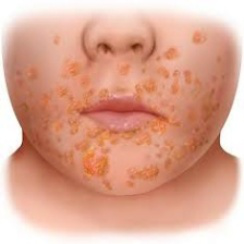

In [90]:
PIL.Image.open(str(testing_image_paths[0]))

In [91]:
img=cv2.imread(str(testing_image_paths[0]))
img_resize=cv2.resize(img,(224,224))
img_resize=np.array(img_resize)/255
img_resize.shape

(224, 224, 3)

In [92]:
predictions = model.predict(np.expand_dims(img_resize, axis=0))

1/1 [==============================] - 0s 56ms/step


In [93]:
predictions[0]

array([5.4115814e-04, 9.5420760e-01, 1.2021505e-03, 3.0782684e-03,
       3.5003512e-04, 1.6728028e-04, 1.8002136e-02, 2.0824444e-02,
       1.6268105e-03], dtype=float32)

In [94]:
label_name=['cellulitis',
    'impetigo',
    'athlete-foot',
    'nail-fungus',
    'ringworm',
    'cutaneous-larva-migrans',
    'chickenpox',
    'shingles',
    'normal',]
label_name[np.argmax(predictions[0])]

'impetigo'

In [ ]:
# Thank you!!!!